In [1]:
import itertools
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
from hcl_gen import HCLSequence
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
model_file="model_v1_20epoc_batch3755.h5"
test_dir="OCR/test"
model=load_model(model_file)
valGen=HCLSequence(test_dir,128)
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(valGen,100,workers=8,use_multiprocessing=True)
y_pred = np.argmax(Y_pred, axis=1)
y_true=[i % 3755 for i in range(len(y_pred))]
print('Confusion Matrix')
cnf_matrix=confusion_matrix(y_true, y_pred, labels=[i for i in range(10,20)])
print(cnf_matrix)
print('Classification Report')
print(classification_report(y_true, y_pred))
#target_names = ['Cats', 'Dogs', 'Horse']
#plt.figure()
#plot_confusion_matrix(cnf_matrix,classes=[i for i in range(10,20)])
#plt.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Confusion Matrix
[[4 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 3]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         4
           8       0.75      0.75      0.75         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      0.75      0.86         4
          12       1.00    

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [2]:
##Plot model performance with various batch size

import matplotlib.pyplot as plt

def plt_hist(hist,main_title,batch_size):
# summarize history for accuracy
#model.summary()
  epochs=12
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle(main_title)
  ax1.plot(hist['acc'])
  ax1.plot(hist['val_acc'])
  #ax1.title('model accuracy-[epocs:{}][batchsize:{}]'.format(epochs,batch_size))
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
  ax2.plot(hist['loss'])
  ax2.plot(hist['val_loss'])
  #ax2.title('model loss-[epocs:{}][batchsize:{}]'.format(epochs,batch_size))
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='upper left')
  plt.show()

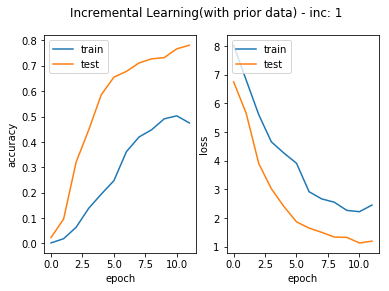

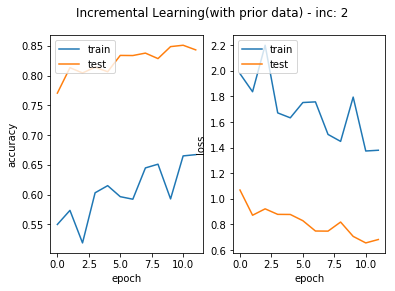

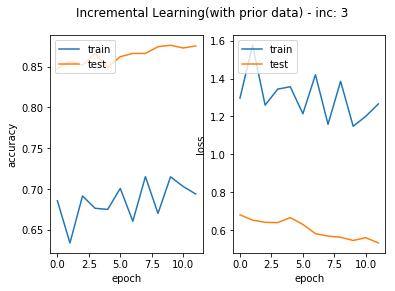

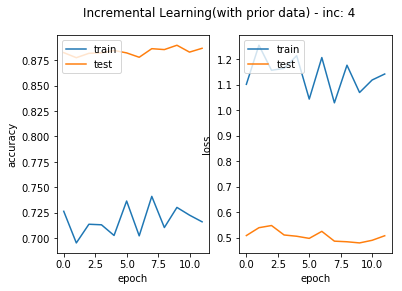

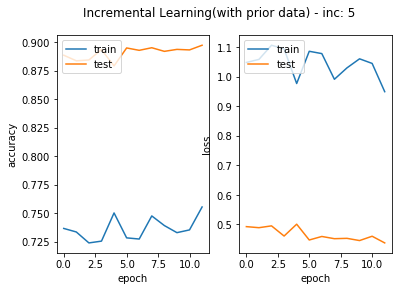

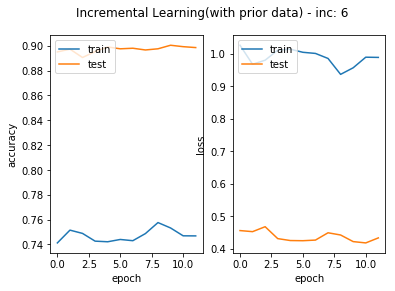

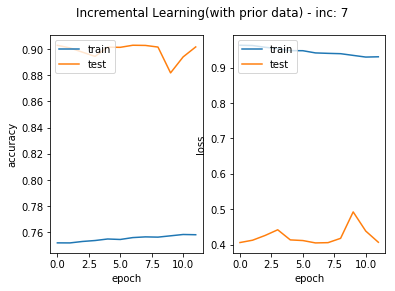

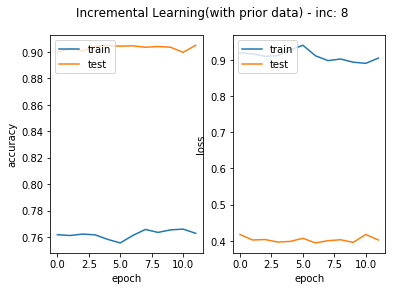

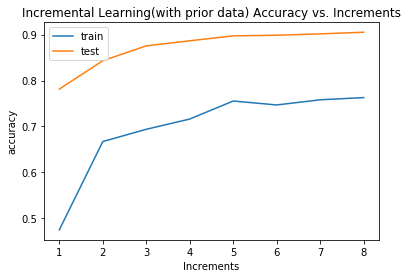

In [3]:
import os
import json
epochs=12
path='inc'
group=1
inc_acc=[]
inc_val_acc=[]
for inc in [0,183,366,549,732,915,1098,1281]:
    with open("{}/ocr_hist_ep12_ba2048_inc{}.json".format(path,inc), 'r') as f:
      hist=json.load(f)
      plt_hist(hist,"Incremental Learning(with prior data) - inc: {}".format(group), group)
      group+=1
      inc_acc.append(hist['acc'][-1])
      inc_val_acc.append(hist['val_acc'][-1])
    
plt.plot(range(1,9),inc_acc)
plt.plot(range(1,9),inc_val_acc)
plt.title("Incremental Learning(with prior data) Accuracy vs. Increments")
plt.xlabel("Increments")
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
inc_acc

[0.4748201630806011,
 0.6671402727971312,
 0.693877006489071,
 0.7161658448599727,
 0.7554532744193989,
 0.7468341764856558,
 0.7580915178571429,
 0.7628734150870902]

In [12]:
[round(i,2) for i in inc_val_acc]

[0.78, 0.84, 0.88, 0.89, 0.9, 0.9, 0.9, 0.91]

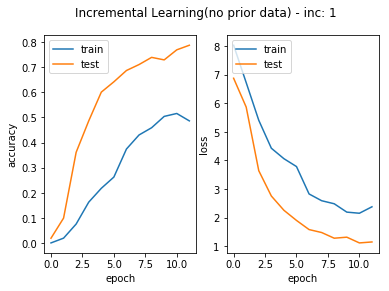

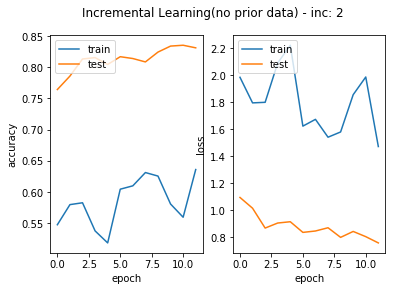

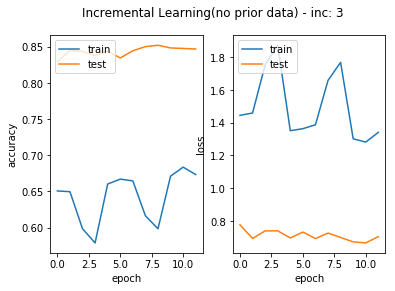

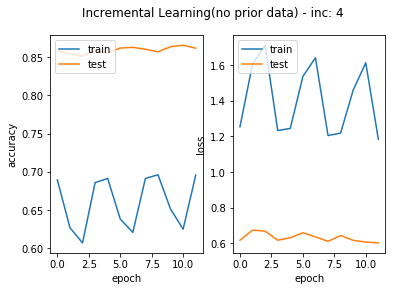

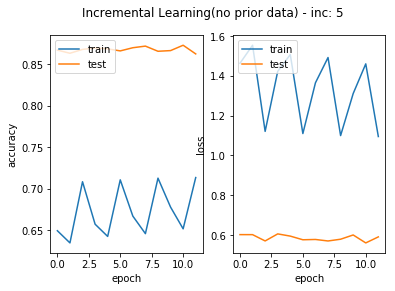

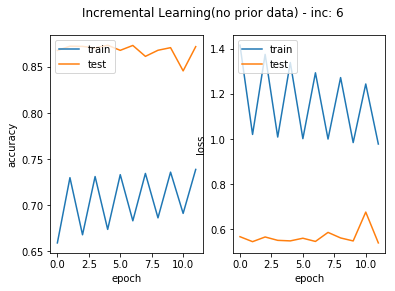

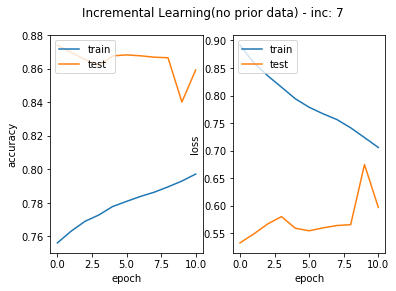

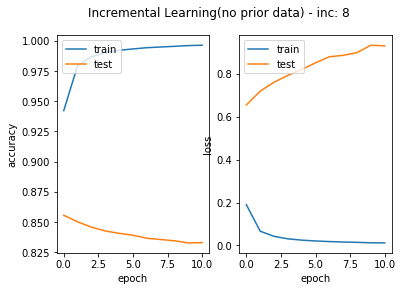

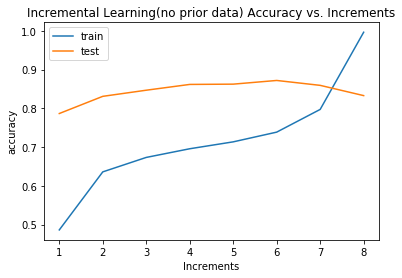

In [15]:
import os
import json
epochs=12
path='./inc_no_prior'
group=1
inc_acc_no_prior=[]
inc_val_acc_no_prior=[]
for inc in [0,183,366,549,732,915,1098,1281]:
    with open("{}/ocr_hist_ep12_ba2048_inc{}.json".format(path,inc), 'r') as f:
      hist=json.load(f)
      plt_hist(hist,"Incremental Learning(no prior data) - inc: {}".format(group), group)
      group+=1
      inc_acc_no_prior.append(hist['acc'][-1])
      inc_val_acc_no_prior.append(hist['val_acc'][-1])
    
plt.plot(range(1,9),inc_acc_no_prior)
plt.plot(range(1,9),inc_val_acc_no_prior)
plt.title("Incremental Learning(no prior data) Accuracy vs. Increments")
plt.xlabel("Increments")
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
[round(i,2) for i in inc_acc_no_prior]

[0.49, 0.64, 0.67, 0.7, 0.71, 0.74, 0.8, 1.0]

In [18]:
[round(i,2) for i in inc_val_acc_no_prior]

[0.79, 0.83, 0.85, 0.86, 0.86, 0.87, 0.86, 0.83]

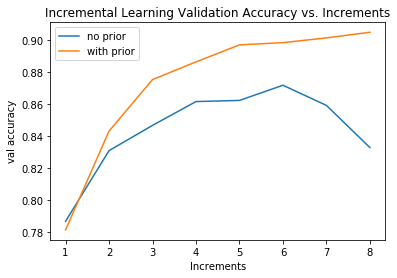

In [19]:
## plot acc comparison
plt.plot(range(1,9),inc_val_acc_no_prior)
plt.plot(range(1,9),inc_val_acc)
plt.xlabel("Increments")
plt.ylabel("val accuracy")
plt.title("Incremental Learning Validation Accuracy vs. Increments")
plt.legend(['no prior', 'with prior'], loc='upper left')
plt.show()

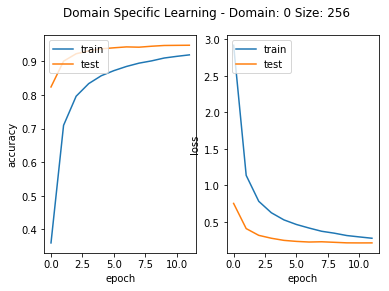

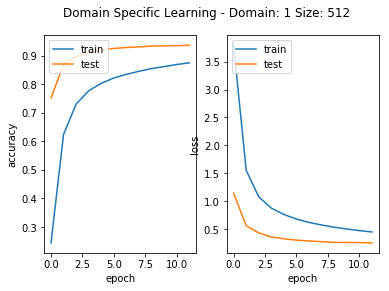

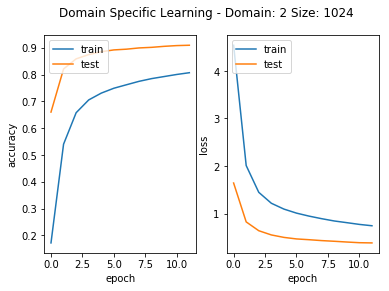

In [33]:
# dom no sharing no bootstrap
from hcl_gen import HCLSequence
from keras.models import load_model
from keras.utils import multi_gpu_model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

epochs=12
group = 0
path='./dom_no_merge'
dom_acc = []
dom_val_acc = []
for begin_char, batch_size in zip([0,256,256+512,],[256,512,1024]): #zip(index,subsetsize)    
    with open("{}/ocr_hist_ep{}_ba{}_dom{}.json".format(path,epochs,batch_size,begin_char), 'r') as f:
      hist=json.load(f)
      plt_hist(hist,"Domain Specific Learning - Domain: {} Size: {}".format(group,batch_size), group)
      group+=1
      dom_acc.append(hist['acc'][-1])
      dom_val_acc.append(hist['val_acc'][-1])
    

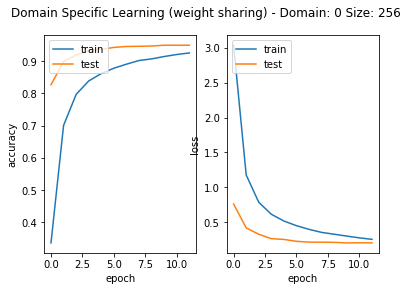

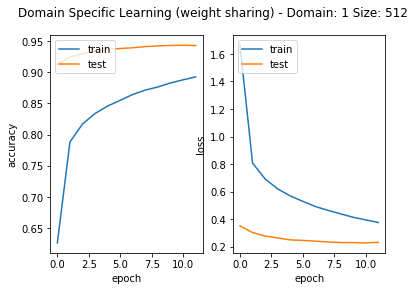

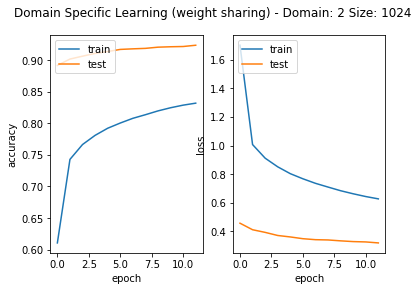

In [25]:
## dom weight sharing
from hcl_gen import HCLSequence
from keras.models import load_model
from keras.utils import multi_gpu_model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

epochs=12
group = 0
path='./dom'
dom_acc_share = []
dom_val_acc_share = []
for begin_char, batch_size in zip([0,256,256+512,],[256,512,1024]): #zip(index,subsetsize)    
    with open("{}/ocr_hist_ep{}_ba{}_dom{}.json".format(path,epochs,batch_size,begin_char), 'r') as f:
      hist=json.load(f)
      plt_hist(hist,"Domain Specific Learning (weight sharing) - Domain: {} Size: {}".format(group,batch_size), group)
      group+=1
      dom_acc_share.append(hist['acc'][-1])
      dom_val_acc_share.append(hist['val_acc'][-1])

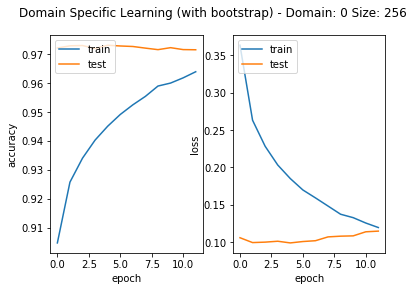

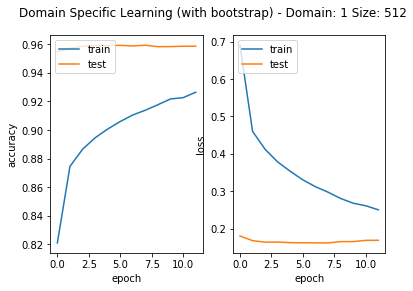

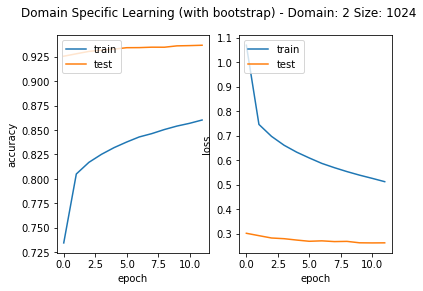

In [28]:
## dom weight sharing
from hcl_gen import HCLSequence
from keras.models import load_model
from keras.utils import multi_gpu_model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

epochs=12
group = 0
path='./dom_with_bootstrap'
dom_acc_bootstrap = []
dom_val_acc_bootstrap = []
for begin_char, batch_size in zip([0,256,256+512,],[256,512,1024]): #zip(index,subsetsize)    
    with open("{}/ocr_hist_ep{}_ba{}_dom{}.json".format(path,epochs,batch_size,begin_char), 'r') as f:
      hist=json.load(f)
      plt_hist(hist,"Domain Specific Learning (with bootstrap) - Domain: {} Size: {}".format(group,batch_size), group)
      group+=1
      dom_acc_bootstrap.append(hist['acc'][-1])
      dom_val_acc_bootstrap.append(hist['val_acc'][-1])

In [21]:
# evaluate domain subset on base model ocr_model_ep12_ba2048.h5
from hcl_gen import HCLSequence
from keras.models import load_model
from keras.utils import multi_gpu_model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

epochs=12
test_path = 'OCR/test'
scores = []
model_path= "./models/ocr_model_ep12_ba2048.h5"
for begin_char, batch_size in zip([0,256,256+512,],[256,512,1024]): #zip(index,subsetsize)
    #myGenTrain=HCLSequence(train_path, batch_size,chunk=(begin_char,batch_size)) # 700
    myGenTest= HCLSequence(test_path, batch_size,len(HCLSequence(test_path, batch_size, chunk=(begin_char,batch_size)))//3, chunk=(begin_char,batch_size))
    #load_model and evaluate it with test data of the same subset(domain)
    #model_path=("{}/ocr_model_ep{}_ba{}_dom{}.h5".format(path,epochs,batch_size,begin_char))
    model=load_model(model_path)
    parallel_model = multi_gpu_model(model,gpus=2)
    parallel_model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])
    
    scores.append(parallel_model.evaluate_generator(myGenTest, workers=10, use_multiprocessing=True, verbose=1))

/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


200/200 [==============================] - 57s 284ms/step


In [32]:
dom_val_acc_share

[0.9487890625, 0.942607421875, 0.9232421875]

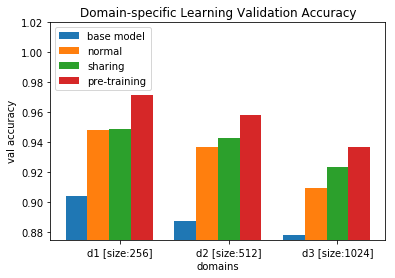

In [34]:
import numpy as np
## plot acc comparison
x=np.arange(1,4)
plt.bar(x-0.4,[score[1] for score in scores],width=0.2)
plt.bar(x-0.2,dom_val_acc,width=0.2)
plt.bar(x,dom_val_acc_share,width=0.2)
plt.bar(x+0.2,dom_val_acc_bootstrap,width=0.2)

plt.ylim(bottom=0.875)
plt.xticks(x,('d1 [size:256]', 'd2 [size:512]', 'd3 [size:1024]'))

plt.xlabel("domains")
plt.ylabel("val accuracy")
plt.title("Domain-specific Learning Validation Accuracy")
plt.legend(['base model', 'normal', 'sharing','pre-training'], loc='upper left')
plt.show()

In [36]:
[round(score[1],2) for score in scores]

[0.9, 0.89, 0.88]

In [38]:
[round(i,2) for i in dom_val_acc]

[0.95, 0.94, 0.91]

In [39]:
[round(i,2) for i in dom_val_acc_share]

[0.95, 0.94, 0.92]

In [40]:
[round(i, 2) for i in dom_val_acc_bootstrap]

[0.97, 0.96, 0.94]

In [30]:
## dom weight sharing
from hcl_gen import HCLSequence
from keras.models import load_model
from keras.utils import multi_gpu_model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

epochs=12
path='./dom_with_bootstrap'
test_path = 'OCR/test'
scores_all = []
myGenTest= HCLSequence(test_path, batch_size,len(HCLSequence(test_path, batch_size))//3)

for begin_char, batch_size in zip([0,256,256+512,],[256,512,1024]): #zip(index,subsetsize)    
    #myGenTrain=HCLSequence(train_path, batch_size,chunk=(begin_char,batch_size)) # 700
    #load_model and evaluate it with test data of the same subset(domain)
    model_path=("{}/ocr_model_ep{}_ba{}_dom{}.h5".format(path,epochs,batch_size,begin_char))
    model=load_model(model_path)
    parallel_model = multi_gpu_model(model,gpus=2)
    parallel_model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])
    
    scores_all.append(parallel_model.evaluate_generator(myGenTest, workers=10, use_multiprocessing=True, verbose=1))

 91/734 [==>...........................] - ETA: 3:12

Process ForkPoolWorker-49:
Process ForkPoolWorker-50:
Process ForkPoolWorker-51:
Process ForkPoolWorker-52:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: 

  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/data_utils.py", line 401, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/data_utils.py", line 401, in get_index
    r

In [ ]:
## test if domain model(with pre-training) still works on entire dataset.
import numpy as np
## plot acc comparison
x=np.arange(1,4)
plt.bar(x-0.1,[score[1] for score in scores],width=0.2)
#plt.bar(x-0.2,dom_val_acc,width=0.2)
#plt.bar(x,dom_val_acc_share,width=0.2)
#plt.bar(x+0.2,dom_val_acc_bootstrap,width=0.2)
plt.bar(x+0.1,[score[1] for score in scores_all],width=0.2)

#plt.ylim(bottom=0.875)
plt.xticks(x,('d1 [size:256]', 'd2 [size:512]', 'd3 [size:1024]'))

plt.xlabel("domains")
plt.ylabel("val accuracy")
plt.title("Domain-specific Learning Validation Accuracy")
plt.legend(['base model', 'domain model'], loc='upper right')
plt.show()

In [ ]:
scores_all